In [1]:
#!/usr/bin/python
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import seaborn as sns
sns.set_style("ticks")

#for mem
import statsmodels.api as sm
import statsmodels.formula.api as smf


In [2]:
#read in my data file
df1 = pd.read_csv('data/q4_vs_ipda-dbr-exclude.csv')
df1.head()

,PID,time_mo_ART,IPDA_intact,IPDA_total,q4_intact,q4_total,Ncells,Exclude
0,P1,8.0,10.53,998.64,4.04,38.16,2227200.0,0.0
1,P1,14.0,28.31,547.35,6.51,52.08,1536000.0,0.0
2,P1,38.0,44.88,705.65,7.81,55.34,1536000.0,0.0
3,P1,121.0,10.79,874.68,1.60,31.73,3120000.0,0.0
4,P2,8.0,2213.41,3955.79,33.85,106.77,768000.0,0.0


In [3]:
#code to replace with 1/N cells
#for i in range(len(df1)):
#    if np.isnan(df1['IPDA_intact'].iloc[i]):
#        df1['IPDA_intact'].iloc[i]=1/df1['Ncells'].iloc[i]
#        df1['IPDA_total'].iloc[i]=1/df1['Ncells'].iloc[i]
        
#but actually this leads to super low, must be wrong, instead just dropna
df1=df1.dropna()


N= 10
n= 4
n= 2
n= 2
n= 4
n= 2
n= 3
n= 4
n= 2
n= 3
n= 3


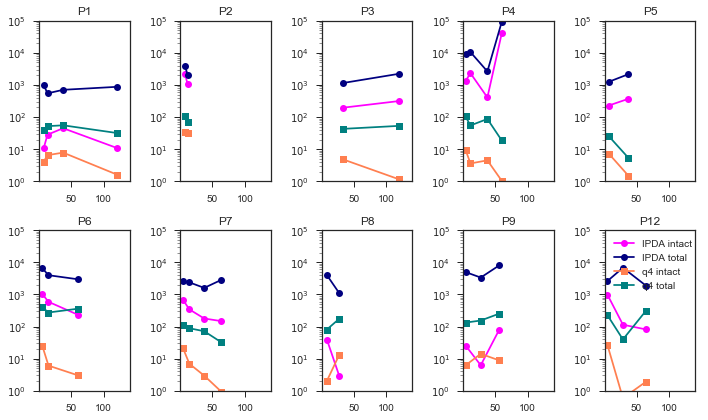

In [4]:
#look at all individuals

#look at numbers, print

print('N=',len(np.unique(df1['PID'])))
nl=[]
plt.figure(figsize=(10,6))
for ip,pid in enumerate(df1['PID'].unique()):
    tdf = df1[df1['PID']==pid]
    
    print('n=',len(tdf))
    nl.append(len(tdf))
    plt.subplot(2,5,ip+1)
    plt.semilogy(tdf['time_mo_ART'],tdf['IPDA_intact'],marker='o',label='IPDA intact',color='magenta')
    plt.plot(tdf['time_mo_ART'],tdf['IPDA_total'],marker='o',label='IPDA total',color='navy')
    plt.plot(tdf['time_mo_ART'],tdf['q4_intact'],marker='s',label='q4 intact',color='coral')
    plt.plot(tdf['time_mo_ART'],tdf['q4_total'],marker='s',label='q4 total',color='teal')
    plt.ylim([1,1e5])
    plt.xlim([1,140])
    plt.title(pid)
        
plt.legend()
plt.tight_layout()

In [5]:
#number of time points per person
print(np.median(nl),np.min(nl),np.max(nl))

3.0 2 4


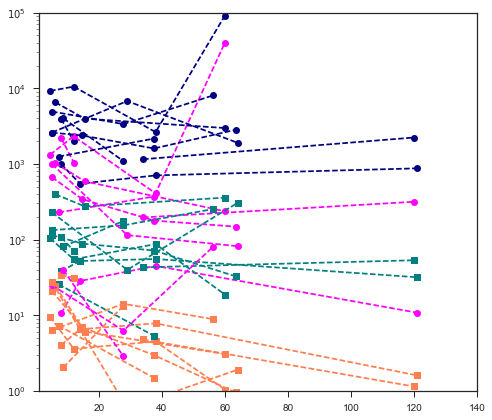

In [6]:
#look at all individuals, all on same plot
plt.figure(figsize=(7,6))
for ip,pid in enumerate(df1['PID'].unique()):
    tdf = df1[df1['PID']==pid]
    plt.semilogy(tdf['time_mo_ART'],tdf['IPDA_intact'],marker='o',label='IPDA intact',color='magenta',ls='--')
    plt.plot(tdf['time_mo_ART'],tdf['IPDA_total'],marker='o',label='IPDA total',color='navy',ls='--')
    plt.plot(tdf['time_mo_ART'],tdf['q4_intact'],marker='s',label='q4 intact',color='coral',ls='--')
    plt.plot(tdf['time_mo_ART'],tdf['q4_total'],marker='s',label='q4 total',color='teal',ls='--')
    plt.ylim([1,1e5])
    plt.xlim([1,140])
plt.tight_layout()

In [7]:
#take log, add columns, for log-linear MEM later

df1['lint1']=np.log(df1['IPDA_intact'])
df1['ltot1']=np.log(df1['IPDA_total'])
df1['lintq']=np.log(df1['q4_intact'])
df1['ltotq']=np.log(df1['q4_total'])

df1['IPDA_def']=df1['IPDA_total']-df1['IPDA_intact']
df1['q4_def']=df1['q4_total']-df1['q4_intact']

df1['ldef1']=np.log(df1['IPDA_def'])
df1['ldefq']=np.log(df1['q4_def'])

#deal with int = tot
df1.replace([np.inf, -np.inf], np.nan, inplace=True) 
df1 = df1.dropna()

In [8]:
#look at timescale of measurements

print(np.min(df1['time_mo_ART']),np.max(df1['time_mo_ART']))

4.5 121.0


q4_intact 6.08
q4_def 72.91999999999999
IPDA_intact 

/Applications/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:2171: UserWarning: The boxplot API has been changed. Attempting to adjust your arguments for the new API (which might not work). Please update your code. See the version 0.6 release notes for more info.
  warnings.warn(msg, UserWarning)


228.34
IPDA_def 1926.69


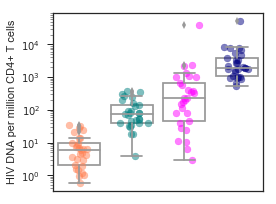

In [9]:
#compare all sizes across times

czl=['coral','teal','magenta','navy',]

jit=0.1
plt.figure(figsize=(4,3))
sns.boxplot((df1[['q4_intact','q4_def','IPDA_intact','IPDA_def',]]),color='white')
for i,dt in enumerate(['q4_intact','q4_def','IPDA_intact','IPDA_def',]):
    plt.scatter(np.random.normal(0,jit,len(df1))+i,(df1[dt]),color=czl[i],alpha=0.5)
    print(dt,np.median(df1[dt]))
    #print(dt,10**np.mean(np.log10(df1[df1['time_mo_ART']<12][dt])))
plt.ylabel('HIV DNA per million CD4+ T cells')
plt.xticks([])
plt.semilogy()
plt.tight_layout()
plt.savefig('figures/sizes.pdf',dpi=600)

/Applications/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:2171: UserWarning: The boxplot API has been changed. Attempting to adjust your arguments for the new API (which might not work). Please update your code. See the version 0.6 release notes for more info.
  warnings.warn(msg, UserWarning)


MannwhitneyuResult(statistic=363.0, pvalue=0.18769456269385748)


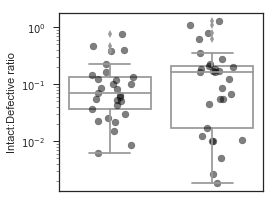

In [10]:
#ratio of intact to defective for each

df1['q4_ratio']=df1['q4_intact']/df1['q4_def']
df1['IPDA_ratio']=df1['IPDA_intact']/df1['IPDA_def']

jit=0.1
plt.figure(figsize=(4,3))
sns.boxplot((df1[['q4_ratio','IPDA_ratio']]),color='white')
for i,dt in enumerate(['q4_ratio','IPDA_ratio']):
    plt.scatter(np.random.normal(0,jit,len(df1))+i,(df1[dt]),color='k',alpha=0.5)
plt.ylabel('Intact:Defective ratio')
print(st.mannwhitneyu(df1['q4_ratio'],df1['IPDA_ratio']))
plt.xticks([])
plt.semilogy()
plt.tight_layout()
plt.savefig('figures/ratios.pdf',dpi=600)

/Applications/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:2171: UserWarning: The boxplot API has been changed. Attempting to adjust your arguments for the new API (which might not work). Please update your code. See the version 0.6 release notes for more info.
  warnings.warn(msg, UserWarning)


early MannwhitneyuResult(statistic=37.0, pvalue=0.39554075646039083)
late MannwhitneyuResult(statistic=130.0, pvalue=0.15947549368090397)


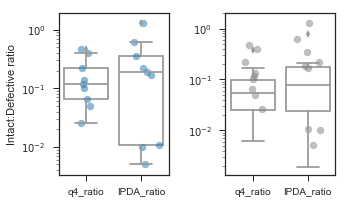

In [11]:
#ratio of intact to defective for each
#and early vs late

tdf_early=df1[df1['time_mo_ART']<12]
tdf_late=df1[df1['time_mo_ART']>12]

jit=0.1
plt.figure(figsize=(5,3))

plt.subplot(121)
sns.boxplot((tdf_early[['q4_ratio','IPDA_ratio']]),color='white')
plt.ylabel('Intact:Defective ratio')
print('early',st.mannwhitneyu(tdf_early['q4_ratio'],tdf_early['IPDA_ratio']))

plt.subplot(122)
sns.boxplot((tdf_late[['q4_ratio','IPDA_ratio']]),color='white')
print('late',st.mannwhitneyu(tdf_late['q4_ratio'],tdf_late['IPDA_ratio']))

for i,dt in enumerate(['q4_ratio','IPDA_ratio']):
    plt.subplot(121)
    plt.scatter(np.random.normal(0,jit,len(tdf_early))+i,(tdf_early[dt]),color='tab:blue',alpha=0.5)
    plt.semilogy()

    plt.subplot(122)
    plt.scatter(np.random.normal(0,jit,len(tdf_early))+i,(tdf_early[dt]),color='gray',alpha=0.5)
    plt.semilogy()
#plt.xticks([])
plt.tight_layout()
plt.savefig('figures/ratios2.pdf',dpi=600)

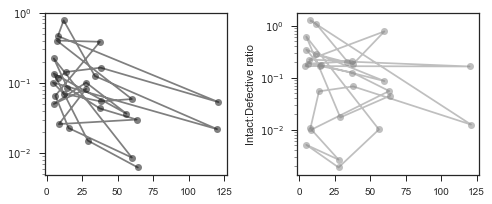

In [12]:
#ratio of intact to defective for each over time

czl=['black','gray']
jit=0.1
plt.figure(figsize=(7,3))
for i,dt in enumerate(['q4_ratio','IPDA_ratio']):
    plt.subplot(121+i)
    plt.semilogy(df1['time_mo_ART'],df1[dt],color=czl[i],marker='o',alpha=0.5)
plt.ylabel('Intact:Defective ratio')
#print(st.mannwhitneyu(df1['q4_ratio'],df1['IPDA_ratio']))
plt.tight_layout()
plt.savefig('figures/ratios.pdf',dpi=600)

early SpearmanrResult(correlation=0.8499999999999999, pvalue=0.0037047773275858133)
late SpearmanrResult(correlation=0.1929824561403509, pvalue=0.4429441508248101)


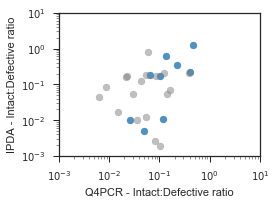

In [13]:
#ratio of intact to defective for each over time

czl=['black','gray']
jit=0.1
plt.figure(figsize=(4,3))
plt.scatter(tdf_early['q4_ratio'],tdf_early['IPDA_ratio'],c='tab:blue',marker='o',alpha=0.8)
plt.scatter(tdf_late['q4_ratio'],tdf_late['IPDA_ratio'],c='gray',marker='o',alpha=0.5)
plt.xlabel('Q4PCR - Intact:Defective ratio')
plt.ylabel('IPDA - Intact:Defective ratio')

print('early',st.spearmanr(tdf_early['q4_ratio'],tdf_early['IPDA_ratio']))
print('late',st.spearmanr(tdf_late['q4_ratio'],tdf_late['IPDA_ratio']))
plt.loglog()
plt.xlim([1e-3,10])
plt.ylim([1e-3,10])
plt.tight_layout()
plt.savefig('figures/ratios.pdf',dpi=600)

/Applications/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:2171: UserWarning: The boxplot API has been changed. Attempting to adjust your arguments for the new API (which might not work). Please update your code. See the version 0.6 release notes for more info.
  warnings.warn(msg, UserWarning)


q4_intact 10.61601464360193
q4_def 87.56892661734058
IPDA_intact 256.01425088786607
IPDA_def 2553.2237227077057


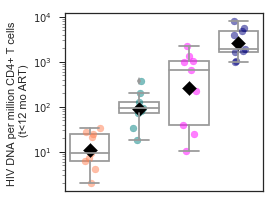

In [14]:
#compare all sizes at time <12mo

czl=['coral','teal','magenta','navy',]

jit=0.1
plt.figure(figsize=(4,3))
sns.boxplot((df1[df1['time_mo_ART']<12][['q4_intact','q4_def','IPDA_intact','IPDA_def',]]),color='white')
for i,dt in enumerate(['q4_intact','q4_def','IPDA_intact','IPDA_def',]):
    plt.scatter(np.random.normal(0,jit,len(df1[df1['time_mo_ART']<12]))+i,(df1[df1['time_mo_ART']<12][dt]),color=czl[i],alpha=0.5)
    print(dt,10**np.mean(np.log10(df1[df1['time_mo_ART']<12][dt])))
    plt.scatter(i,10**np.mean(np.log10(df1[df1['time_mo_ART']<12][dt])),marker='D',color='k',s=100)
plt.ylabel('HIV DNA per million CD4+ T cells \n (t<12 mo ART)')
plt.xticks([])
plt.semilogy()
plt.tight_layout()
plt.savefig('figures/sizes_t<12.pdf',dpi=600)

/Applications/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:2171: UserWarning: The boxplot API has been changed. Attempting to adjust your arguments for the new API (which might not work). Please update your code. See the version 0.6 release notes for more info.
  warnings.warn(msg, UserWarning)


q4_intact 3.294985495033734
q4_def 67.42059460239373
IPDA_intact 128.1607296713396
IPDA_def 2283.8797448622618


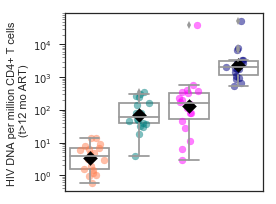

In [15]:
#compare all sizes, times>12

plt.figure(figsize=(4,3))
sns.boxplot((df1[df1['time_mo_ART']>12][['q4_intact','q4_def','IPDA_intact','IPDA_def',]]),color='white')
for i,dt in enumerate(['q4_intact','q4_def','IPDA_intact','IPDA_def',]):
    plt.scatter(np.random.normal(0,jit,len(df1[df1['time_mo_ART']>12]))+i,(df1[df1['time_mo_ART']>12][dt]),color=czl[i],alpha=0.5)
    print(dt,10**np.mean(np.log10(df1[df1['time_mo_ART']>12][dt])))
    plt.scatter(i,10**np.mean(np.log10(df1[df1['time_mo_ART']>12][dt])),marker='D',color='k',s=100)
plt.ylabel('HIV DNA per million CD4+ T cells \n (t>12 mo ART)')
plt.xticks([])
plt.semilogy()
plt.tight_layout()
plt.savefig('figures/sizes_t>12.pdf',dpi=600)

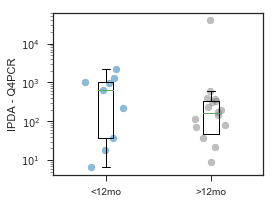

In [16]:
#check early vs late

plt.figure(figsize=(4,3))
tdf_early=df1[df1['time_mo_ART']<12]
tdf_late=df1[df1['time_mo_ART']>12]

plt.scatter(np.random.normal(1,jit,len(tdf_early)),tdf_early['IPDA_intact']-tdf_early['q4_intact'],c='tab:blue',alpha=0.5)
plt.scatter(np.random.normal(2,jit,len(tdf_late)),tdf_late['IPDA_intact']-tdf_late['q4_intact'],c='gray',alpha=0.5)
plt.semilogy()

plt.boxplot([tdf_early['IPDA_intact']-tdf_early['q4_intact'],tdf_late['IPDA_intact']-tdf_late['q4_intact']])
plt.xticks([1,2],['<12mo','>12mo'])
plt.ylabel('IPDA - Q4PCR')
plt.tight_layout()
plt.savefig('figures/earlyvslate.pdf',dpi=600)


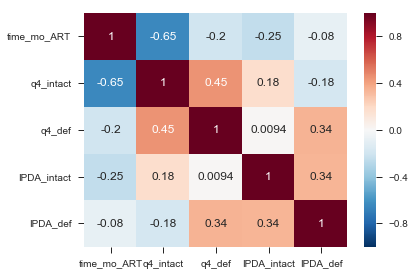

In [17]:
#plot correlation matrix

corrdf = df1[['time_mo_ART','q4_intact','q4_def','IPDA_intact', 'IPDA_def', ]].corr(method='spearman')

plt.figure(figsize=(6,4))
sns.heatmap(corrdf,annot=True)
#plt.yticks([0,1,2,3,4],['ART mo', 'Q4PCR intact', 'Q4PCR defective', 'IPDA intact', 'IPDA defective'])
plt.tight_layout()
plt.savefig('figures/corrz.pdf',dpi=600)

In [18]:
st.spearmanr(df1['q4_intact'],df1['time_mo_ART'])

SpearmanrResult(correlation=-0.6458697881548814, pvalue=0.0001542252249200853)

In [19]:
st.spearmanr(df1['IPDA_intact'],df1['time_mo_ART'])

SpearmanrResult(correlation=-0.24636270269825372, pvalue=0.1976377485914727)

In [20]:
st.spearmanr(df1['q4_intact'],df1['q4_def'])

SpearmanrResult(correlation=0.4453201970443349, pvalue=0.015484756788529433)

In [21]:
st.spearmanr(df1['IPDA_intact'],df1['IPDA_def'])

SpearmanrResult(correlation=0.33694581280788166, pvalue=0.07387693832645649)

In [22]:
st.spearmanr(df1['q4_def'],df1['IPDA_def'])

SpearmanrResult(correlation=0.34482758620689646, pvalue=0.0669635349661982)

In [23]:
st.spearmanr(df1['q4_intact'],df1['IPDA_intact'])

SpearmanrResult(correlation=0.17881773399014775, pvalue=0.35334755973811516)

In [24]:
st.spearmanr(df1['q4_intact'][df1['time_mo_ART']<12],df1['IPDA_intact'][df1['time_mo_ART']<12])

SpearmanrResult(correlation=0.8333333333333333, pvalue=0.005265691029161748)

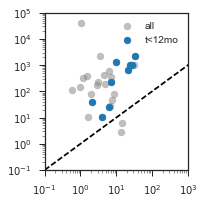

In [25]:
plt.figure(figsize=(3,3))
plt.scatter(df1['q4_intact'],df1['IPDA_intact'],color='gray',alpha=0.5,label='all')
plt.scatter(df1['q4_intact'][df1['time_mo_ART']<12],df1['IPDA_intact'][df1['time_mo_ART']<12],color='tab:blue',label='t<12mo')
plt.loglog([0.1,1e5],[0.1,1e5],ls='--',color='k',alpha=1)
plt.ylim([0.1,1e5])
plt.xlim([0.1,1e3])

plt.legend()
plt.tight_layout()
plt.savefig('figures/intact<12.pdf',dpi=600)

In [26]:
#after 6mo to estimate terminal half-life
minmo=6
df_hl=df1[df1['time_mo_ART']>minmo]

#df_hl=df1[(df1['time_mo_ART']>minmo) & (df1['time_mo_ART']<72)]


lintq [39.70143586 24.78784516 99.66454151]
ldefq [478.27899188  64.70916287 -88.71459635]
lint1 [533.52515895  36.89460489 -42.81631657]
ldef1 [-256.73102504   90.45411939  -53.06283213]


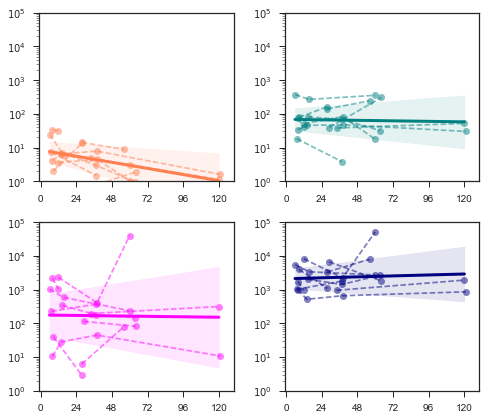

In [27]:
#fit the log-linear mixed effects model

czl=['coral','teal','magenta','navy',]

mml=[]
mmlfull=[]

plt.figure(figsize=(7,6))
simt=np.linspace(minmo,120,1000)

for idd,dd in enumerate(['lintq','ldefq','lint1','ldef1',]):
    
    #run MEM
    md = smf.mixedlm(dd+' ~ time_mo_ART', df_hl, groups=df_hl['PID'])
    mdf = md.fit()
    mem_results=[mdf.params[1],mdf.conf_int().iloc[1,0],mdf.conf_int().iloc[1,1],
                 mdf.params[0],mdf.conf_int().iloc[0,0],mdf.conf_int().iloc[0,1]]

    #print(mdf.summary())
    mml.append(mem_results[:3])
    mmlfull.append(mem_results)
    
    plt.subplot(2,2,1+idd)
    #plot total reservoir data relative to initiation of ART
    for ip,pid in enumerate(df_hl['PID'].unique()):
        tdf = df_hl[df_hl['PID']==pid]
        plt.plot(tdf['time_mo_ART'],np.exp(tdf[dd]),marker='o',label=dd,color=czl[idd],ls='--',alpha=0.5)

    #m,y0=np.polyfit(df1['time_mo_ART'],df1[dd],1)
    #m,y0=np.polyfit(df_hl['time_mo_ART'],np.log10(np.exp(df_hl[dd])),1) #just to check on log vs log10 mistake... thank goodness not this
    
    plt.plot(simt,np.exp(mem_results[3]+mem_results[0]*simt),color=czl[idd],lw=3)
    plt.fill_between(simt,np.exp(mem_results[4]+mem_results[1]*simt),np.exp(mem_results[5]+mem_results[2]*simt),color=czl[idd],alpha=0.1)
    plt.xticks(np.linspace(0,120,6))
    plt.semilogy()
    plt.ylim([1,1e5])
    plt.xlim([-1,130])
    #plt.title(np.min([np.round(-np.log(2)/mem_results[0]),np.inf]))
    print(dd,-np.log(2)/mem_results[:3])
    plt.tight_layout()    
plt.savefig('figures/fit_all.pdf',dpi=600)
#plt.savefig('figures/fit_all<5yr.pdf',dpi=600)



In [28]:
#intact Q4
mean0=mml[0][0] #mean of q4pcr intact decay
std0=(mml[0][0]-mml[0][1])/1.96 #std dev of q4pcr intact decay, 2sigma

#defective Q4
mean1=mml[1][0] 
std1=(mml[1][0]-mml[1][1])/1.96 

#intact IPDA
mean2=mml[2][0] 
std2=(mml[2][0]-mml[2][1])/1.96 

#defective IPDA
mean3=mml[3][0] 
std3=(mml[3][0]-mml[3][1])/1.96 


In [29]:
#do it as bootstrap t-test?

tbs=0
nruns=1000
for i in range(nruns):
    NBS=10
    tbs += st.ttest_ind(np.random.normal(mean0,std0,NBS),np.random.normal(mean2,std2,NBS))[1]
    
tbs/nruns

0.0016870824041684712

In [30]:
#likelihood of defective Q4 and defective IPDA being different
st.norm.pdf((mean1-mean3)/std3)

0.2932117112935841

In [31]:
#likelihood of IPDA intacts and Q4 intacts being different
st.norm.pdf((mean0-mean2)/std0)

0.004232604878457989

In [32]:
#likelihood of IPDA intacts being different than either type of defectives
print(st.norm.pdf((mean2-mean1)/std2),st.norm.pdf((mean2-mean3)/std2))

0.3988858566378433 0.36081798965748535


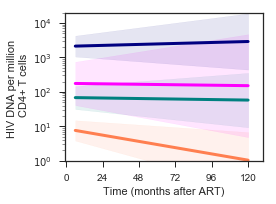

In [33]:
#plot the fits on top of eachother

plt.figure(figsize=(4,3))

ll=['Q4PCR Intact','Q4PCR Defective','IPDA Intact', 'IPDA Defective']
for im,mem_results in enumerate(mmlfull):

    plt.semilogy(simt,np.exp(mem_results[3]+mem_results[0]*simt),color=czl[im],lw=3,label=ll[im])
    plt.fill_between(simt,np.exp(mem_results[4]+mem_results[1]*simt),np.exp(mem_results[5]+mem_results[2]*simt),color=czl[im],alpha=0.1)

plt.ylabel('HIV DNA per million \n CD4+ T cells')
plt.xticks(np.linspace(0,120,6))
plt.xlabel('Time (months after ART)')
plt.ylim([1,2e4])
plt.xlim([-1,130])
#plt.legend()
plt.tight_layout()    
#plt.savefig('fit_summary<5yr.pdf',dpi=600)
plt.savefig('fit_summary.pdf',dpi=600)


Q4PCR Intact 24mo 73.0327719510731
Q4PCR Intact 120mo 13.665094378645657
Q4PCR Defective 24mo 97.4250763711821
Q4PCR Defective 120mo 84.77115772990086
IPDA Intact 24mo 97.6886010934648
IPDA Intact 120mo 86.23388916867218
IPDA Defective 24mo 104.97983896980183
IPDA Defective 120mo 136.04128150560436


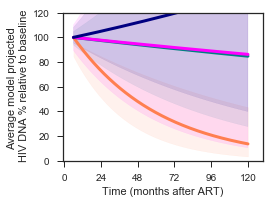

In [45]:
#plot the fits on top of eachother as % change

plt.figure(figsize=(4,3))

ll=['Q4PCR Intact','Q4PCR Defective','IPDA Intact', 'IPDA Defective']
simt2=np.linspace(0,120,1000)
for im,mem_results in enumerate(mmlfull):

    #plt.plot(simt2,np.exp(mem_results[3]+mem_results[0]*simt2)/np.exp(mem_results[3])*100,color=czl[im],lw=3,label=ll[im])
    plt.plot(simt,np.exp(mem_results[3]+mem_results[0]*simt)/np.exp(mem_results[3]+mem_results[0]*simt[0])*100,color=czl[im],lw=3,label=ll[im])
    
    print(ll[im],'24mo',np.exp(mem_results[3]+mem_results[0]*24)/np.exp(mem_results[3]+mem_results[0]*simt[0])*100)
    print(ll[im],'120mo',np.exp(mem_results[3]+mem_results[0]*120)/np.exp(mem_results[3]+mem_results[0]*simt[0])*100)
    plt.fill_between(simt,np.exp(mem_results[4]+mem_results[1]*simt)/np.exp(mem_results[4])*100,np.exp(mem_results[5]+mem_results[2]*simt)/np.exp(mem_results[5])*100,color=czl[im],alpha=0.1)

plt.ylabel('Average model projected \n HIV DNA % relative to baseline')
plt.xticks(np.linspace(0,120,6))
plt.xlabel('Time (months after ART)')
plt.ylim([0,120])
plt.xlim([-1,130])
#plt.legend()
plt.tight_layout()    
#plt.savefig('fit_summary_pct<5yr.pdf',dpi=600)
plt.savefig('fit_summary_pct.pdf',dpi=600)


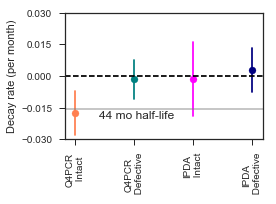

In [35]:
#just show estimated decay rates

plt.figure(figsize=(4,3))
for i in range(len(mml)):
    plt.scatter(i,mml[i][0],color=czl[i])
    plt.plot([i,i],[mml[i][1],mml[i][2]],color=czl[i])
    
plt.axhline(0,ls='--',color='k')
plt.xticks(range(4),['Q4PCR\n Intact', 'Q4PCR\n Defective', 'IPDA\n Intact', 'IPDA\n Defective'], rotation=90)
plt.axhline(-np.log(2)/44,ls='-',color='gray',alpha=0.5)
plt.annotate('44 mo half-life',[0.4,-0.02])

plt.ylim([-0.03,0.03])
plt.yticks(np.linspace(-0.03,0.03,5))
plt.ylabel('Decay rate (per month)')

plt.tight_layout()    
#plt.savefig('figures/all4<5yr.pdf',dfpi=600)
plt.savefig('figures/all4.pdf',dfpi=600)

In [36]:
edf = pd.read_excel('data/ACDX IPDA Data Report - SciEx 153412 (Rockefeller)_incl_Alice_Q4+PS_env_defective_091322.xlsx',
                    sheetname='dbr')

In [37]:
for i in range(len(edf)):
    if edf['PS+env sequence Frequency (defective)'].iloc[i]==0:
        edf['PS+env sequence Frequency (defective)'].iloc[i]=0.5/edf['Cells tested'].iloc[i]*1e6

/Applications/anaconda/lib/python3.6/site-packages/pandas/core/indexing.py:141: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [38]:
edf.columns

Index(['ID', 'Time point (m. post-ART)',
       'PS+env sequence Frequency (defective)', 'Cells tested'],
      dtype='object')

In [39]:
edf['ld']=np.log(edf['PS+env sequence Frequency (defective)'])
edf['ARTmo']=edf['Time point (m. post-ART)']

[ 180.25470867   50.49377393 -114.82359674]


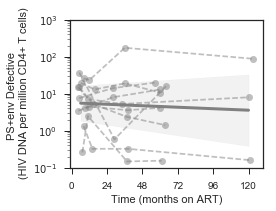

In [40]:
#fit the log-linear mixed effects model

plt.figure(figsize=(4,3))

#run MEM
md2 = smf.mixedlm('ld ~ ARTmo', edf, groups=edf['ID'])
mdf2 = md2.fit()
mem_results2=[mdf2.params[1],mdf2.conf_int().iloc[1,0],mdf2.conf_int().iloc[1,1],
             mdf2.params[0],mdf2.conf_int().iloc[0,0],mdf2.conf_int().iloc[0,1]]

#print(mdf.summary())
mml.append(mem_results2[:3])

#plot total reservoir data relative to initiation of ART
for ip,pid in enumerate(edf['ID'].unique()):
    tdf = edf[edf['ID']==pid]
    plt.plot(tdf['Time point (m. post-ART)'],np.exp(tdf['ld']),marker='o',label=dd,color='gray',ls='--',alpha=0.5)

plt.plot(simt,np.exp(mem_results2[3]+mem_results2[0]*simt),color='gray',lw=3)
plt.fill_between(simt,np.exp(mem_results2[4]+mem_results2[1]*simt),np.exp(mem_results2[5]+mem_results2[2]*simt),color='gray',alpha=0.1)
plt.xticks(np.linspace(0,120,6))
plt.semilogy()
plt.ylim([0.1,1e3])
plt.xlabel('Time (months on ART)')
plt.ylabel('PS+env Defective \n (HIV DNA per million CD4+ T cells)')
plt.xlim([-1,130])
#plt.title(np.min([np.round(-np.log(2)/mem_results[0]),np.inf]))
print(-np.log(2)/mem_results2[:3])
plt.tight_layout()    
plt.savefig('figures/fit_PSenv.pdf',dpi=600)
#plt.savefig('figures/fit_all<5yr.pdf',dpi=600)



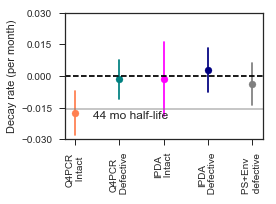

In [41]:
#just show estimated decay rates

czl=['coral','teal','magenta','navy','gray']

plt.figure(figsize=(4,3))
for i in range(len(mml)):
    plt.scatter(i,mml[i][0],color=czl[i])
    plt.plot([i,i],[mml[i][1],mml[i][2]],color=czl[i])
    
plt.axhline(0,ls='--',color='k')
plt.xticks(range(5),['Q4PCR\n Intact', 'Q4PCR\n Defective', 'IPDA\n Intact', 'IPDA\n Defective','PS+Env \n defective'], rotation=90)
plt.axhline(-np.log(2)/44,ls='-',color='gray',alpha=0.5)
plt.annotate('44 mo half-life',[0.4,-0.02])

plt.ylim([-0.03,0.03])
plt.yticks(np.linspace(-0.03,0.03,5))
plt.ylabel('Decay rate (per month)')

plt.tight_layout()    
#plt.savefig('figures/all4<5yr.pdf',dfpi=600)
plt.savefig('figures/all4+psenv.pdf',dfpi=600)

In [44]:
#defective PSENV+
mean4=mml[4][0] 
std4=(mml[4][0]-mml[4][1])/1.96 

st.norm.pdf((mean4-mean2)/std4)

0.3511796112391021